# Text Summarization 

# ----------------------------------------------------------------------------------------

# import libraries

In [19]:
import pandas as pd # dealing with CVS files.
from simpletransformers.seq2seq import Seq2SeqModel, Seq2SeqArgs # Use the Seq2Seq model to apply text summarization
import nltk # nltk lib that used to apply text processing.
from nltk.corpus import stopwords # used to remmove stopwords from the text
from nltk.tokenize import word_tokenize # apply tokenize on the text to convert it into list of words 
from nltk.stem import WordNetLemmatizer # It looks up words in dictionary
import string # dealing to strings
import matplotlib.pylab as plt

# Read the CSV dataset file

In [20]:
# Read the dataset from the CSV file.
df = pd.read_csv("My_Data_Set.csv")
df.head()


input_text   
0  Sarah found an old book in the attic. As she f...  \
1  In a small village, a young boy named Lucas di...   
2  Emily, an aspiring artist, painted a masterpie...   
3  Once in a faraway land, a humble farmer named ...   
4  Emma, a talented pianist, performed a mesmeriz...   

                                         target_text  
0  Sarah embarks on a magical quest to save a kin...  
1  Lucas discovers a hidden portal and learns val...  
2  Emily's masterpiece painting touches hearts an...  
3  Jacob's magical crop brings prosperity and har...  
4  Emma's mesmerizing piano concert connects peop...

# Apply text pre-processing techniques

In [21]:
# Apply text preprocessing.
stop_words = set(stopwords.words('english')) # read all stopwords
lemmatizer = WordNetLemmatizer() 

# function to apply pre-processing techniques on the words
def preprocess_text(text):
    # extract the words from the text 
    tokens = word_tokenize(text) 
    # remove punctuation from the text 
    tokens = [word for word in tokens if word not in string.punctuation]
    # remove stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]
    # apply limatize on each word
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # connect each word again in one string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# apply the preprocess frunction in all columns
df['input_text'] = df['input_text'].apply(preprocess_text)
df['target_text'] = df['target_text'].apply(preprocess_text)

# Define the model that we will use

In [22]:
# Initialize the model and arguments
model_args = Seq2SeqArgs()

#  An epoch refers to a complete iteration over the entire training dataset.
model_args.num_train_epochs = 8

# This enables the evaluation of generated text (during training).
model_args.evaluate_generated_text = True

# Initializes the Seq2Seq model with the specified configuration.
model = Seq2SeqModel(
# define the model that we need to use
encoder_decoder_type='bart',
# define the version of the model
encoder_decoder_name='facebook/bart-large',
# take the argments 
args=model_args, 
# False for using GPU -> only use CPU
use_cuda=False
)

# Train the model

In [10]:
# Train the model
model.train_model(df)

Epoch 8 of 8: 100%|██████████| 8/8 [1:09:48<00:00, 523.56s/it]


(360, 1.9751112184228583)

In [11]:
import joblib
# joblib.dump(model , 'Model.pkl')

['Model.pkl']

In [23]:
Model = joblib.load('Model.pkl')


# Evaluate the model

In [13]:
# Evaluate the model
results = model.eval_model(df)

Generating outputs: 100%|██████████| 45/45 [01:43<00:00,  2.30s/it]


In [14]:
results

{'eval_loss': 0.0302739794469542}

# Use model for prediction

In [30]:
# Use the model for prediction
predictions = Model.predict(["Well, how are you doing my friend? the fat man asked, looking enthusiastically at his friend. Are you in the service? What grade have you reached?"])

Generating outputs: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


In [32]:
# Well, how are you doing my friend? the fat man asked, looking enthusiastically at his friend. Are you in the service? What grade have you reached?
# Fat man's question ignite hope in service

In [31]:
print(predictions)

["Fat man's question ignite hope in service"]


# Plots

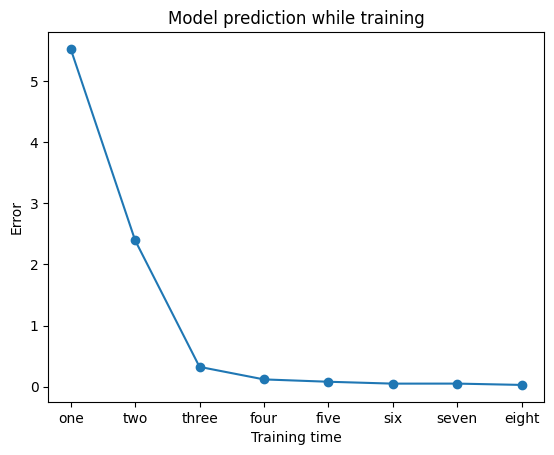

In [17]:
values = [5.5232, 2.3938, 0.3242, 0.1193, 0.0810, 0.0502, 0.0507, 0.0291]
names = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight']

plt.plot(names, values, marker='o')
plt.xlabel('Training time')
plt.ylabel('Error')
plt.title('Model prediction while training')
plt.show()

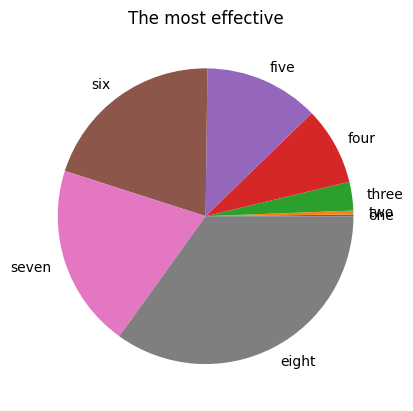

In [18]:
# CMake the smallest value is the biggest value
sizes = [(1 / value) for value in values]

# Create the pie chart
plt.pie(sizes, labels=names)

# Add a title
plt.title('The most effective')

# Show the chart
plt.show()